In [1]:
# filename: R0-Dimmunity_sensitive.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# If your CSV has headers like: R0,Dimmunity,s1,s2,s3,...
df = pd.read_csv("./experimental_data/R0_Dimmunity_results_v2.csv")

# Pull columns by name
R0    = df["R0"].to_numpy(dtype=float)
Dimmunity = df["Dimmunity"].to_numpy(dtype=float)

# Everything after R0 & Dimmunity is treated as summary columns
summary_cols = [c for c in df.columns if c not in ("R0", "Dimmunity")]
summary = df[summary_cols].to_numpy(dtype=float)   # shape: (N, K)

print(R0.shape, Dimmunity.shape, summary.shape)

(120,) (120,) (120, 12)


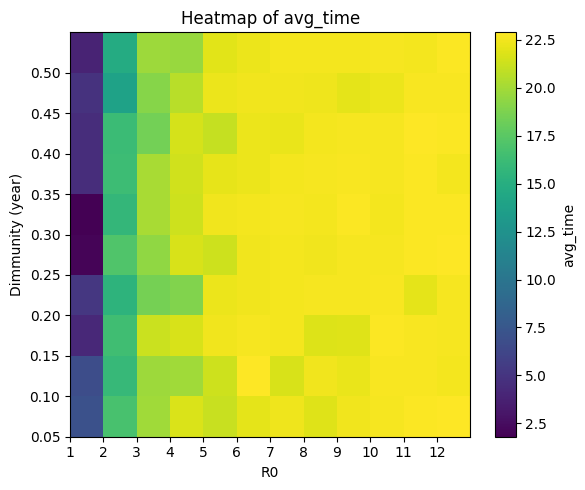

In [16]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[0]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

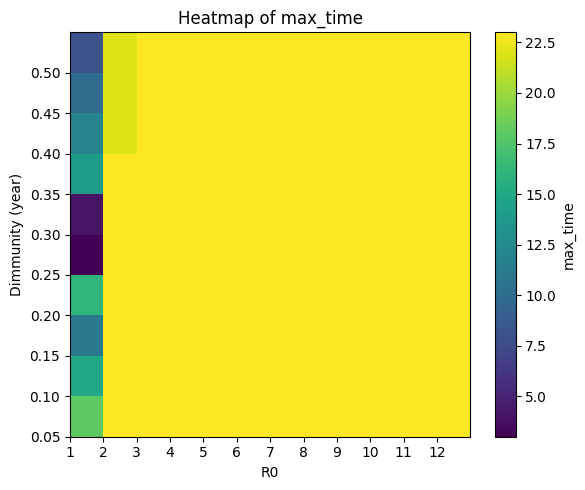

In [17]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[1]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

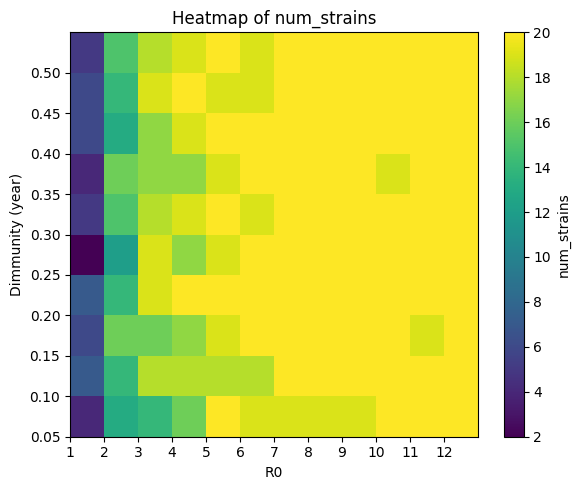

In [18]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[2]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

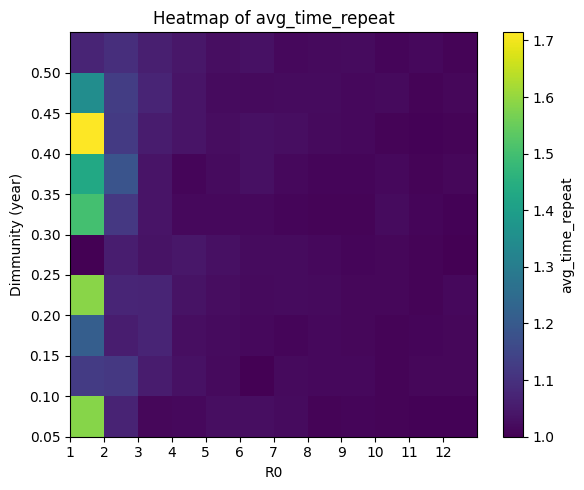

In [19]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[3]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

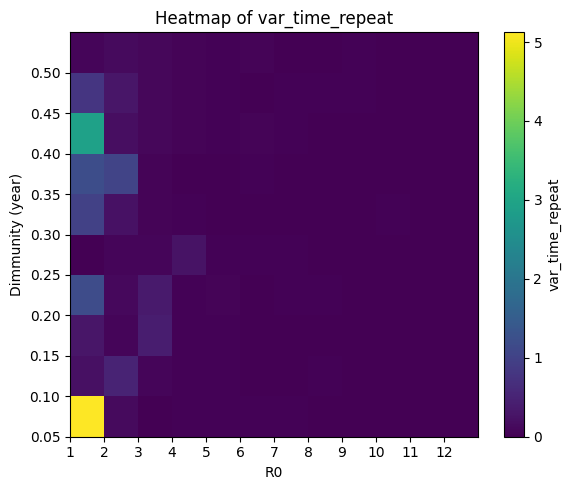

In [20]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[4]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

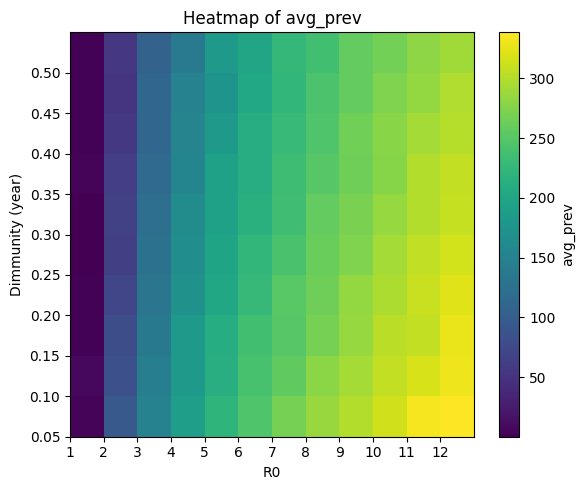

In [21]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[5]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

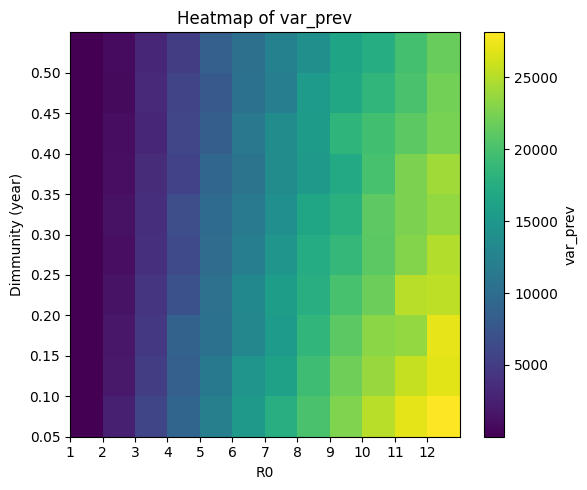

In [22]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[6]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

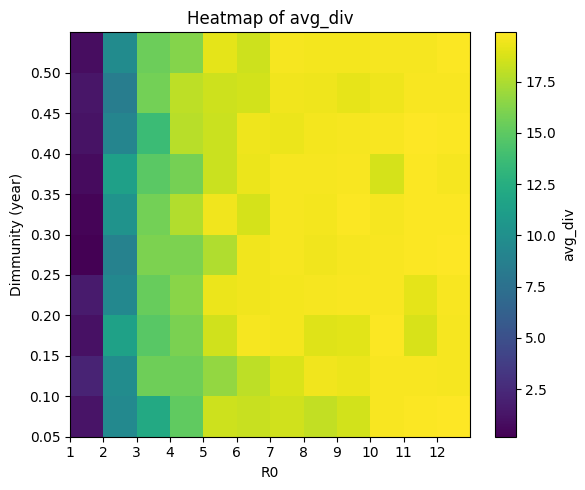

In [23]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[7]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

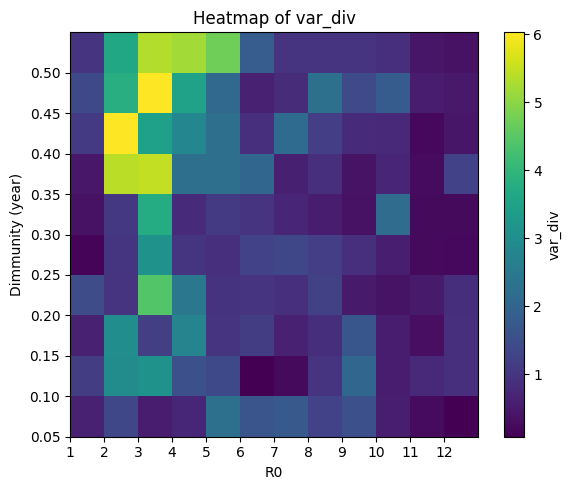

In [24]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[8]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

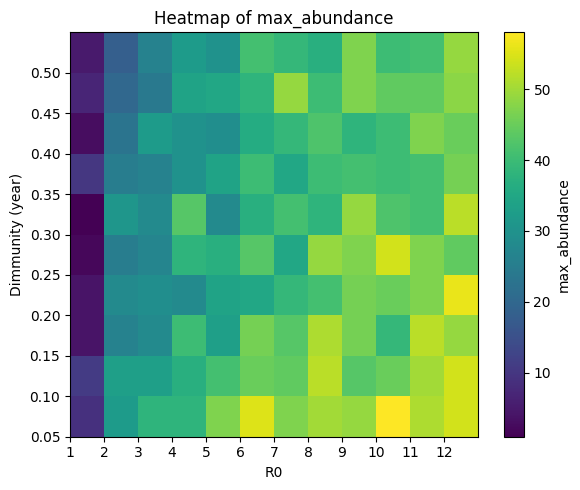

In [25]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[9]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

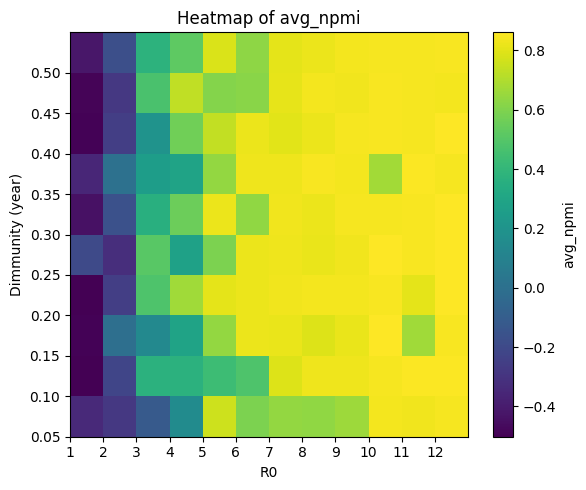

In [26]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[10]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()

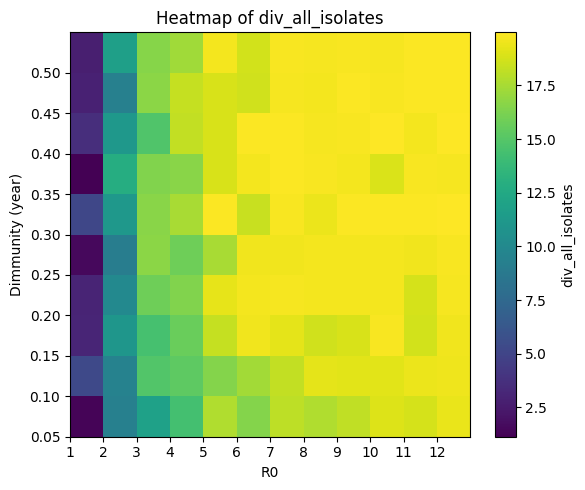

In [27]:
# Build matrix Z (Dimmunity × R0) from your DataFrame
zcol = summary_cols[11]
Z_wide = (df.groupby(["R0","Dimmunity"], as_index=False)[zcol].mean()
            .pivot(index="Dimmunity", columns="R0", values=zcol)
            .sort_index()              # Dimmunity rows
            .sort_index(axis=1))       # R0 cols

Z    = Z_wide.to_numpy()
R0v  = Z_wide.columns.to_numpy(float)   # unique R0 values (treated as LEFT edges)
Dimmunityv = Z_wide.index.to_numpy(float)     # unique Dimmunity values (LEFT edges)

def left_edges_to_right_edges(vals, tol=1e-9):
    """Assume uniform spacing; make right edges as last+step."""
    d = np.diff(vals)
    if not np.allclose(d, d[0], atol=tol, rtol=0):
        raise ValueError("Grid is not uniformly spaced; left-edge scheme needs uniform steps.")
    step = d[0]
    return np.r_[vals, vals[-1] + step], step

R0e,  dR0  = left_edges_to_right_edges(R0v)
Dimmunitye, dDimmunity = left_edges_to_right_edges(Dimmunityv)

# Plot: each Z[j,i] fills [R0v[i], R0v[i]+dR0) × [SIGv[j], SIGv[j]+dSIG)
plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(R0e, Dimmunitye, Z, shading="flat")
plt.xlabel("R0")
plt.ylabel("Dimmunity (year)")
plt.title(f"Heatmap of {zcol}")
plt.colorbar(pcm, label=zcol)

# Axes show exact edge ranges  [min, max+step]
plt.xlim(R0e[0],  R0e[-1])
plt.ylim(Dimmunitye[0], Dimmunitye[-1])

# Optional: tick at left edges or centers
# Left-edge ticks:
plt.xticks(R0v)
plt.yticks(Dimmunityv)
# Or centers:
# plt.xticks(R0v + dR0/2)
# plt.yticks(SIGv + dSIG/2)

plt.tight_layout()
plt.show()